# Housing Sector Indicators

**1. House Price Index (HPI)**

Definition:

    The House Price Index (HPI) measures the change in the price of residential properties over time. It tracks the appreciation or depreciation in the value of houses, typically on a quarterly or yearly basis. The index can be based on sales prices of homes or valuations provided by real estate experts.

Explanation:

    The HPI is a key indicator of the health of the housing market. Rising house prices may indicate increased demand and a strong economy, while falling prices can signal reduced demand or economic challenges.
    It is also used by policymakers and analysts to assess housing affordability, real estate market trends, and to detect potential housing bubbles.
    HPI is typically adjusted for inflation to provide a real measure of house price movements.

**2. Rental Price Index (RPI)**

Definition:

    The Rental Price Index (RPI) measures changes in the cost of renting residential properties over time. It tracks rent prices paid by tenants for housing units, often broken down by region, property type, or other categories.

Explanation:

    The RPI is crucial for understanding trends in the rental market, which is especially important in areas with high proportions of renters compared to homeowners.
    It helps gauge housing affordability for tenants, especially in urban areas where rental demand tends to be high.
    The RPI is also used to assess inflation in housing costs, particularly as it relates to the broader Consumer Price Index (CPI).

**3. Household Construction and Repair Output**

Definition:

    Household construction and repair output measures the value of construction activities related to residential properties, including both new housing construction and renovations or repairs to existing homes. This indicator often includes data on homebuilding (new construction) and maintenance or repair work performed by households or contractors.

Explanation:

    This indicator is a reflection of housing supply and the level of investment in the residential real estate sector.
    Growth in new construction output indicates increased housing supply, which can alleviate housing shortages and stabilize home prices.
    Repair and renovation output is a sign of household wealth and housing market confidence. Higher repair and renovation activity suggests that homeowners are investing in their homes, often during periods of rising property values.
    This measure is important for assessing economic activity in the construction sector, a major contributor to overall economic growth.


## Load Data

In [1]:
import pandas as pd
from mpl_toolkits.mplot3d.proj3d import proj_transform

# Load the Excel file to see the sheet names and the structure of the data
file_path = './data/Housing sector.xlsx'
excel_file = pd.ExcelFile(file_path)

# Display the sheet names to understand what tables are available
sheet_names = excel_file.sheet_names
sheet_names

['Construcion and repair price',
 'Private rent price index',
 'House and mortgage price']

In [86]:
construction_df = pd.read_excel(file_path, sheet_name='Construcion and repair price')
private_rent_df = pd.read_excel(file_path, sheet_name='Private rent price index')
house_mortgage_df = pd.read_excel(file_path, sheet_name='House and mortgage price')

In [95]:
# Fill the missing years by forward filling the year values
construction_df['Year'] = construction_df['Time period'].str.extract(r'(\d{4})').ffill()

# Combine the 'Year' with the month part to form a complete date
construction_df['Date'] = pd.to_datetime(
    construction_df['Year'] + ' ' + construction_df['Time period'].str.extract(r'([A-Za-z]+)')[0] + ' 1',
    format='%Y %b %d')

# Drop the 'Year' column as it's no longer needed
construction_df.drop(columns=['Time period', 'Year'], inplace=True)

# # Rename the columns
construction_df.rename(columns={
    'Construction price index 2015=100': 'Construction Price Index',
    'Repair and maintenance price index 2015=100': 'Repair Price Index'
}, inplace=True)

construction_df = construction_df[['Date', 'Construction Price Index', 'Repair Price Index']]

In [96]:
construction_df.head()

,Date,Construction Price Index,Repair Price Index
0,2014-01-01,100.6,100.4
1,2014-02-01,99.9,100.4
2,2014-03-01,99.4,100.3
3,2014-04-01,98.8,100.2
4,2014-05-01,98.5,100.1


In [87]:
private_rent_df.rename(columns={'Time period': 'Date'}, inplace=True)

In [88]:
private_rent_df.head()

,Date,Rental price,Rental price one bed,Rental price two bed,Rental price three bed,Rental price four or more bed
0,2015-01-01,918,736,844,931,1403
1,2015-02-01,920,739,846,934,1405
2,2015-03-01,924,742,849,937,1412
3,2015-04-01,926,745,852,939,1414
4,2015-05-01,930,748,855,942,1419


In [91]:
# Convert the 'Period' column to a datetime format representing the start of each quarter
house_mortgage_df['Date'] = (['-'.join(x.split()) for x in house_mortgage_df['Period']])
house_mortgage_df['Date'] = pd.to_datetime(house_mortgage_df['Date'], format='mixed')
# # Drop the original 'Period' column as it's no longer needed
house_mortgage_df.drop(columns=['Period'], inplace=True)
house_mortgage_df = house_mortgage_df[['Date', 'House Price', 'Buyers income']]

In [92]:
house_mortgage_df.head()


,Date,House Price,Buyers income
0,1993-01-01,72700,18032
1,1993-04-01,73289,18299
2,1993-07-01,73285,18177
3,1993-10-01,73460,18121
4,1994-01-01,72892,17872


## Descriptive Statistics

In [97]:
construction_df_stats = construction_df.drop(columns=['Date']).describe()
construction_df_stats

,Construction Price Index,Repair Price Index
count,126.000000,126.000000
mean,116.764286,107.481746
std,15.701640,7.065379
min,98.500000,99.600000
25%,103.275000,101.350000
50%,113.900000,105.700000
75%,126.450000,112.325000
max,150.200000,121.200000


    Both construction and repair costs have increased since 2015, but construction costs have risen more significantly.
    
    The fluctuations in construction costs are more pronounced, with a higher spread, indicating variability in construction-related expenses over time.
    
    Repair costs are more stable, though they have still seen a modest increase from the 2015 baseline.

In [89]:
private_rent_df_stats = private_rent_df.drop(columns=['Date']).describe()
private_rent_df_stats

,Rental price,Rental price one bed,Rental price two bed,Rental price three bed,Rental price four or more bed
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1045.820513,838.410256,955.940171,1068.170940,1602.658120
std,91.591730,70.373162,80.517110,97.561766,144.591944
min,918.000000,736.000000,844.000000,931.000000,1403.000000
25%,989.000000,797.000000,907.000000,1006.000000,1513.000000
50%,1027.000000,827.000000,938.000000,1045.000000,1568.000000
75%,1080.000000,857.000000,983.000000,1111.000000,1669.000000
max,1295.000000,1039.000000,1179.000000,1327.000000,1966.000000


    Rental prices rise consistently with the number of bedrooms, with four or more bedrooms having the highest prices and variability.

    One-bedroom rentals are more affordable and show lower price volatility.
    
    The median price progression across bedroom types follows a clear upward trend, reflecting how rental markets typically price properties based on size.

In [93]:
house_mortgage_df_stats = house_mortgage_df.drop(columns=['Date']).describe()
house_mortgage_df_stats

,House Price,Buyers income
count,126.000000,126.000000
mean,209741.793651,38518.698413
std,84902.301120,12493.976969
min,72700.000000,17872.000000
25%,126780.500000,26556.750000
50%,220749.500000,41970.000000
75%,288160.250000,48151.750000
max,338813.000000,61560.000000


    The data shows a large disparity between house prices and buyers' income. On average, house prices are around 5.5 times higher than buyers' incomes.
    
    House prices have a much higher variability, with large fluctuations, while buyers' incomes remain relatively stable.
    
    Affordability could be a major concern, as incomes do not rise in proportion to house prices across all percentiles.

## Visualizations

### Construction and repair costs index 2015 = 100

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

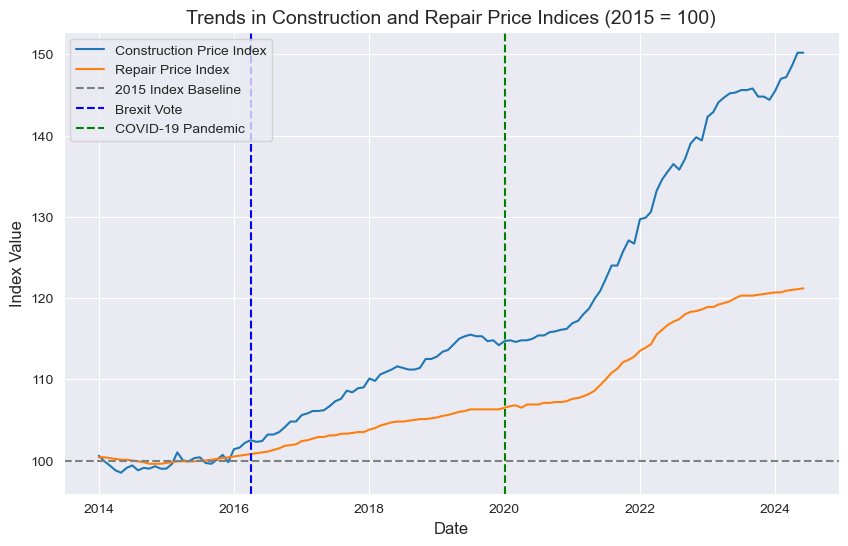

In [112]:
plt.figure(figsize=(10, 6))

plt.plot(construction_df['Date'], construction_df['Construction Price Index'], label="Construction Price Index")
plt.plot(construction_df['Date'], construction_df['Repair Price Index'], label="Repair Price Index")
plt.axhline(y=100, color='gray', linestyle='--', label='2015 Index Baseline')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
# Adding labels, title, and legend
plt.title('Trends in Construction and Repair Price Indices (2015 = 100)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

    The construction price index shows a much sharper rise compared to the repair price index, particularly after the onset of the COVID-19 pandemic. This suggests that the pandemic had a larger impact on new construction projects compared to repair works.
    
    Although the repair price index has risen, it has done so more gradually. This suggests that repair costs are less volatile and perhaps less affected by the pandemic or other economic shocks, compared to construction costs.
    
    Both the Brexit vote and COVID-19 pandemic appear to have contributed to rising costs, but the pandemic had a more pronounced impact, particularly on construction prices.
    
    The construction price surge post-2020 is notable and suggests either increased demand for construction, supply chain disruptions, or other macroeconomic factors that caused a sharp rise in costs.

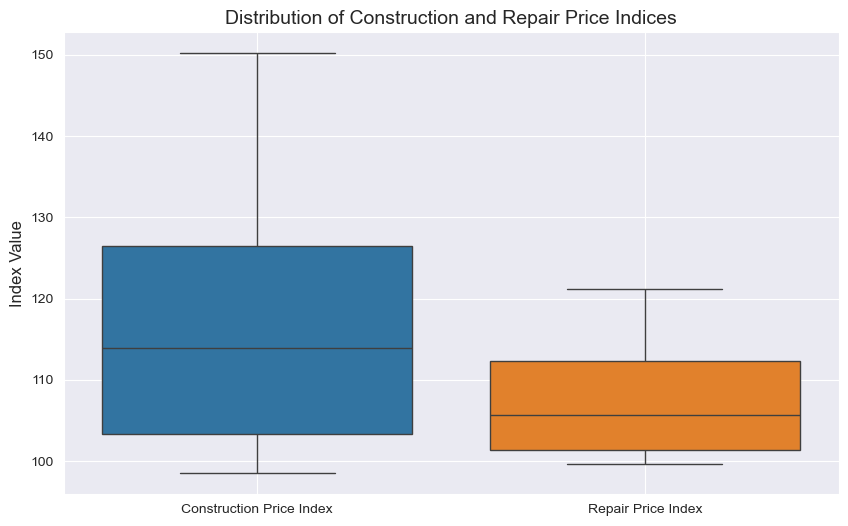

In [109]:
# Boxplot for Comparison of Percentiles (Distribution Overview)
plt.figure(figsize=(10, 6))
sns.boxplot(data=construction_df[['Construction Price Index', 'Repair Price Index']])
plt.title('Distribution of Construction and Repair Price Indices', fontsize=14)
plt.ylabel('Index Value', fontsize=12)
plt.grid(True)
plt.show()

Comparison of Percentiles (Distribution Overview):

    The box plot displays the distribution of the Construction and Repair Price Indices. The boxes represent the interquartile range (25th to 75th percentile), and the lines (whiskers) extend to the minimum and maximum values. This visualization highlights the median, spread, and potential outliers in the data, with construction prices having a wider distribution compared to repair prices.

### Correlation

In [111]:
correlation = construction_df[['Construction Price Index', 'Repair Price Index']].corr()
correlation

,Construction Price Index,Repair Price Index
Construction Price Index,1.000000,0.997892
Repair Price Index,0.997892,1.000000


    The near-perfect correlation (0.9979) suggests that changes in construction costs are almost directly mirrored by changes in repair costs.
    
    Both indices tend to move together, meaning factors affecting construction costs (such as material costs, labor, demand) are likely to also impact repair costs similarly.

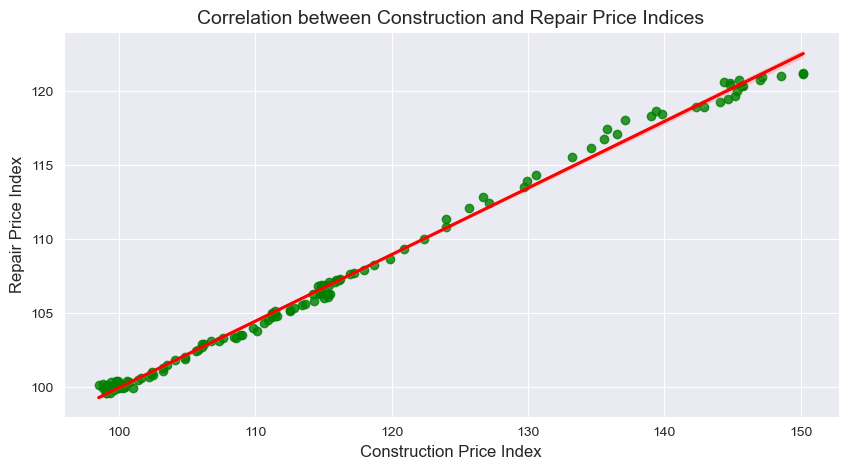

In [110]:
# Correlation between Construction and Repair Price Indices
plt.figure(figsize=(10, 5))
sns.regplot(x=construction_df['Construction Price Index'], y=construction_df['Repair Price Index'], color='g',
            line_kws=dict(color='r'))
plt.title('Correlation between Construction and Repair Price Indices', fontsize=14)
plt.xlabel('Construction Price Index', fontsize=12)
plt.ylabel('Repair Price Index', fontsize=12)
plt.grid(True)
plt.show()

    The scatter plot shows the relationship between the two indices. The trend line (regression line) suggests whether there is a positive or negative correlation. The points align closely with the line, it indicates a strong correlation between the two indices.

### Private rent and Private house price vs Buyers income


**Trends in Rental Price over time**

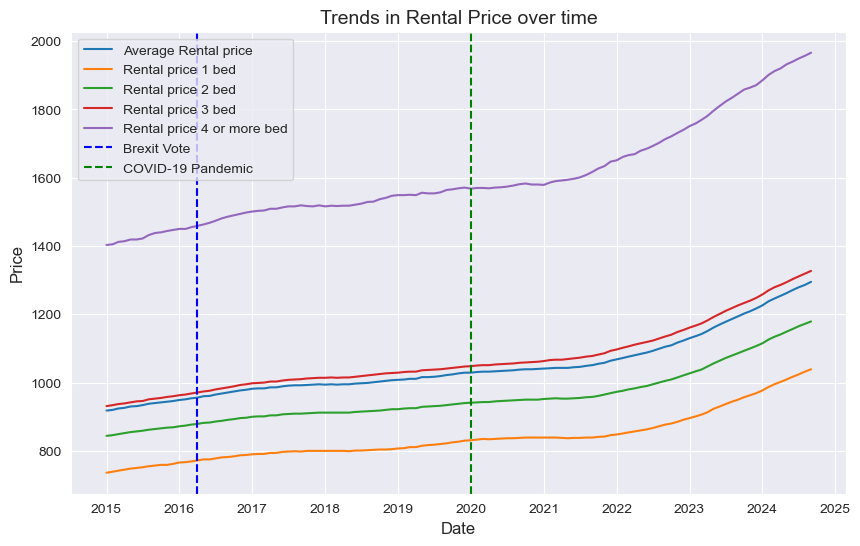

In [119]:
plt.figure(figsize=(10, 6))

plt.plot(private_rent_df['Date'], private_rent_df['Rental price'], label="Average Rental price")
plt.plot(private_rent_df['Date'], private_rent_df['Rental price one bed'], label="Rental price 1 bed")
plt.plot(private_rent_df['Date'], private_rent_df['Rental price two bed'], label="Rental price 2 bed")
plt.plot(private_rent_df['Date'], private_rent_df['Rental price three bed'], label="Rental price 3 bed")
plt.plot(private_rent_df['Date'], private_rent_df['Rental price four or more bed'], label="Rental price 4 or more bed")

plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')

plt.title('Trends in Rental Price over time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

    Rental prices have been consistently increasing over time, with no major disruptions from events like Brexit or the COVID-19 pandemic. However, there is a slight acceleration in prices after 2020.
    
    The rental prices for larger properties (4+ bedrooms) are significantly higher than smaller ones, and the gap is widening. This reflects a market trend where demand for larger homes might be increasing faster than for smaller ones, or supply for these larger homes is more constrained.
    
    While neither Brexit nor the pandemic caused sharp disruptions, the post-pandemic period shows a slightly steeper increase in rental prices, possibly due to changes in demand and supply affected by the global situation.

**Trends in House Price over time**


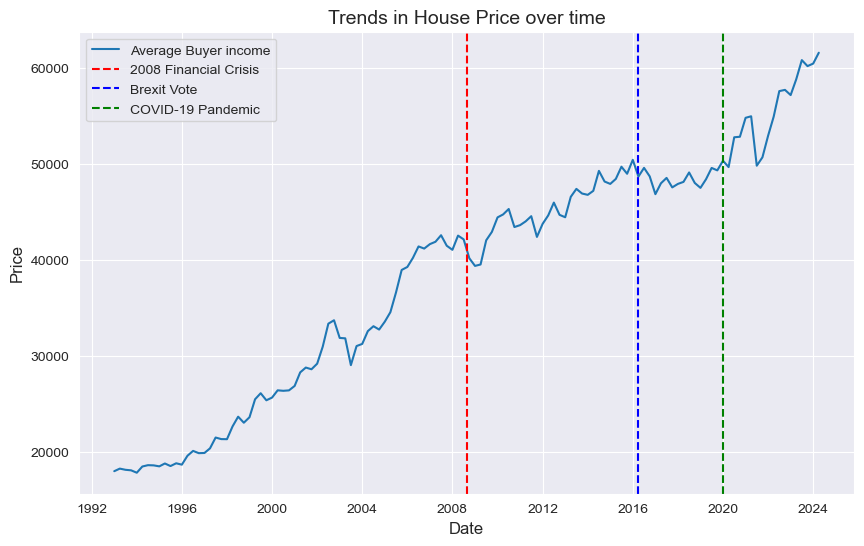

In [128]:
plt.figure(figsize=(10, 6))

plt.plot(house_mortgage_df['Date'], house_mortgage_df['House Price'], label="Average House price")
plt.plot(house_mortgage_df['Date'], house_mortgage_df['Buyers income'], label="Average Buyer income")

plt.axvline(x=pd.Timestamp('2008-09-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')

plt.title('Trends in House Price over time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

Steady Increase in House Prices:

    The overall trend is a significant increase in house prices over time, with notable periods of rapid growth.
    From 1992 to 2008, house prices grew steadily, reflecting rising demand or economic growth during this period.

Impact of the 2008 Financial Crisis:

    The 2008 Financial Crisis (marked by the red dashed line) had a clear effect on house prices. There's a sharp drop or plateau right after the crisis.
    House prices remained flat or grew slowly for a few years after the crisis (2008-2011), reflecting the impact of the housing market crash and economic recession.

Post-2008 Recovery:

    Around 2012, we see a recovery in house prices, with an upward trend continuing steadily, despite some volatility.
    This reflects market stabilization and growth following the economic recovery.

Brexit Vote (2016):

    The Brexit Vote (blue dashed line in 2016) does not cause an immediate, dramatic shift in house prices, but we do observe an increase in volatility starting around 2016.
    House prices continue to rise but show more fluctuation, possibly reflecting uncertainty in the market post-Brexit.

COVID-19 Pandemic (2020):

    The COVID-19 pandemic (green dashed line) shows an interesting pattern. After the initial impact in early 2020, there’s a sharp rise in house prices.
    This could be due to several factors, including shifts in demand for housing (due to remote work), government interventions (such as low interest rates), and supply constraints caused by the pandemic.

Recent Trends:

    In the years following the pandemic, house prices have continued their upward trajectory, but with higher fluctuations compared to the pre-pandemic period.

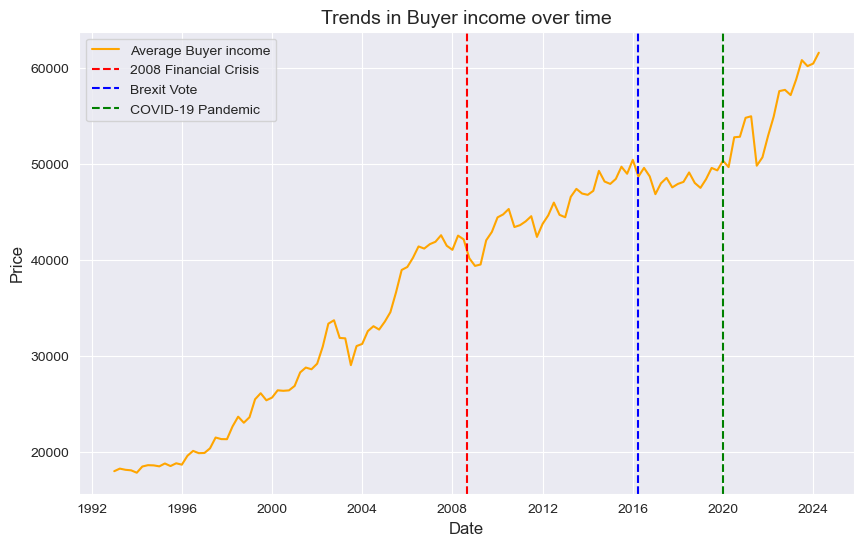

In [130]:
plt.figure(figsize=(10, 6))

plt.plot(house_mortgage_df['Date'], house_mortgage_df['Buyers income'], label="Average Buyer income", color='orange')

plt.axvline(x=pd.Timestamp('2008-09-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x=pd.Timestamp('2016-04-01'), color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x=pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic')

plt.title('Trends in Buyer income over time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

Steady Increase in Income:

    Buyers' income has seen a consistent upward trend from 1992 to 2024, with periodic fluctuations.
    There is a clear pattern of growth, although not as rapid as house prices, which is significant when discussing housing affordability.

Impact of the 2008 Financial Crisis:

    The 2008 Financial Crisis (red dashed line) caused a decrease in income growth.
    We observe a dip and recovery around the crisis, with income stabilizing a few years after the event.

Post-2008 Recovery:

    Post-crisis, income begins to grow again, but at a slower rate compared to the pre-crisis period.
    From 2010 onwards, income trends upward with moderate growth and some fluctuations, especially around 2016.

Brexit Vote (2016):

    The Brexit Vote (blue dashed line) introduces some volatility in income, though the overall trend is still upward. The growth rate appears to slow down slightly, which could be due to market uncertainties surrounding Brexit and its economic impact.

COVID-19 Pandemic (2020):

    The COVID-19 Pandemic (green dashed line) brings more fluctuations to income levels, but there is a clear recovery and a sharp rise following 2020.
    This might reflect government stimulus programs, economic recovery efforts, or changes in the labor market (remote work, shifts in demand for certain jobs, etc.).

Recent Trends:

    Since 2020, there has been a notable rise in buyers' income, with some fluctuations but overall strong growth.
    The post-pandemic recovery seems to have accelerated income growth, possibly due to economic adjustments, inflation, or structural shifts in the labor market.

### Correlation

In [123]:
filtered_house_mortgage_df = house_mortgage_df[house_mortgage_df['Date'] >= '2015-01-01']

merged_df = pd.merge(filtered_house_mortgage_df, private_rent_df, on='Date')

data_for_correlation = merged_df[['House Price', 'Rental price', 'Buyers income']]

correlation_matrix = data_for_correlation.corr()

correlation_matrix

,House Price,Rental price,Buyers income
House Price,1.000000,0.698360,0.676051
Rental price,0.698360,1.000000,0.908229
Buyers income,0.676051,0.908229,1.000000


**A moderately strong positive correlation (0.698) exists between house prices and rental prices.**

    This suggests that when house prices increase, rental prices tend to increase as well. This could be due to housing demand, economic factors, or the affordability of owning versus renting a home.

**A moderately strong positive correlation (0.676) between house prices and buyers' income.**

    As buyers' income increases, house prices tend to rise. This makes sense as higher incomes generally lead to greater purchasing power, which can drive up house prices in competitive markets.

**A very strong positive correlation (0.908) between rental prices and buyers' income.**

    This shows that rental prices are highly dependent on buyers' income. As incomes rise, rental prices also tend to increase significantly, perhaps reflecting landlords adjusting rental prices based on what renters can afford or the increasing demand for rental properties in higher-income areas.

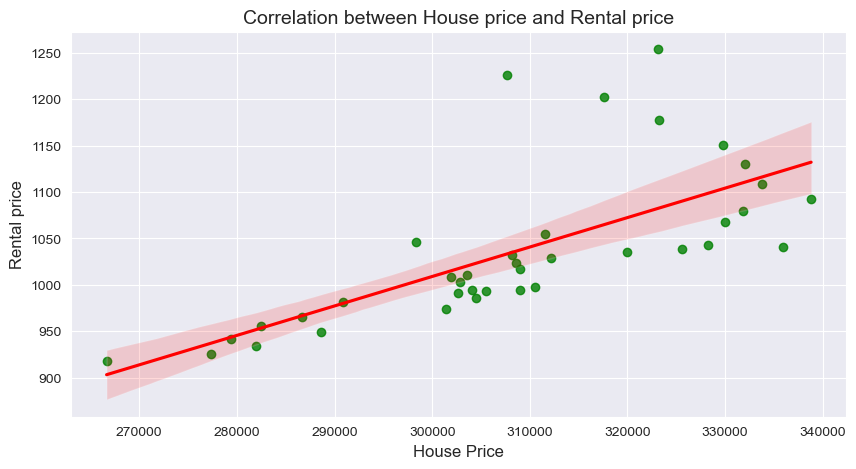

In [125]:
plt.figure(figsize=(10, 5))
sns.regplot(x=data_for_correlation['House Price'],
            y=data_for_correlation['Rental price'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between House price and Rental price', fontsize=14)
plt.xlabel('House Price', fontsize=12)
plt.ylabel('Rental price', fontsize=12)
plt.grid(True)
plt.show()

Positive Correlation: 

    There is a clear positive correlation between house prices and rental prices. As house prices increase, rental prices tend to increase as well.

Linear Trend: 

    The red line represents a linear regression trend, suggesting that rental prices rise consistently with house prices. However, the spread of data points shows that there is some variability.

Deviation from the Trend: 

    While most points follow the general upward trend, there are some outliers where rental prices either spike or drop for certain house prices. This shows that factors other than house prices might influence rental prices.

Confidence Interval: 

    The shaded area around the regression line shows the confidence interval, indicating uncertainty in the model’s predictions. As house prices increase, the confidence interval becomes wider, suggesting more variability in predicting rental prices at higher house prices.

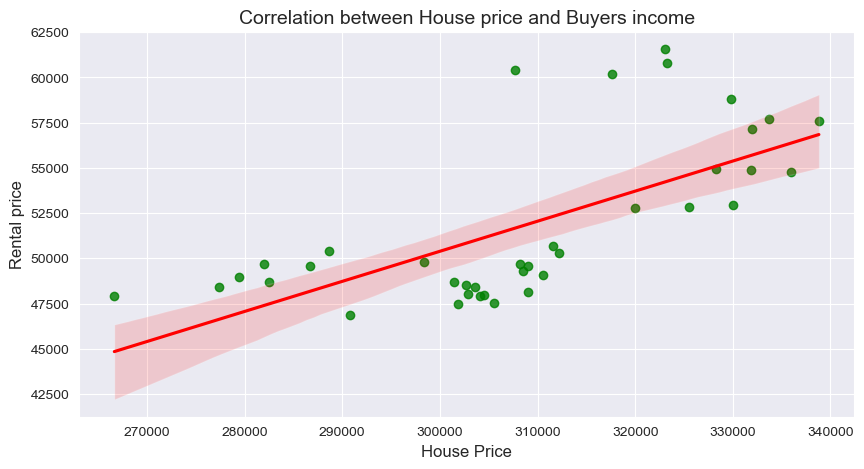

In [126]:
plt.figure(figsize=(10, 5))
sns.regplot(x=data_for_correlation['House Price'],
            y=data_for_correlation['Buyers income'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between House price and Buyers income', fontsize=14)
plt.xlabel('House Price', fontsize=12)
plt.ylabel('Rental price', fontsize=12)
plt.grid(True)
plt.show()

Positive Correlation: 

    There is a positive relationship between house prices and buyers' income, meaning that higher house prices are associated with higher buyers' income.

Linear Trend: 

    The red regression line suggests a strong positive linear relationship, where buyers' income increases as house prices go up.

Wider Spread at Higher Prices: 

    At higher house prices (above 310,000), the points are more spread out, indicating variability in buyers' income for these house prices. This implies that buyers of similarly priced houses may have different income levels.

Confidence Interval: 

    The shaded area around the regression line is the confidence interval. Like the previous chart, the interval becomes wider at higher house prices, indicating greater uncertainty in predicting income at those price levels.

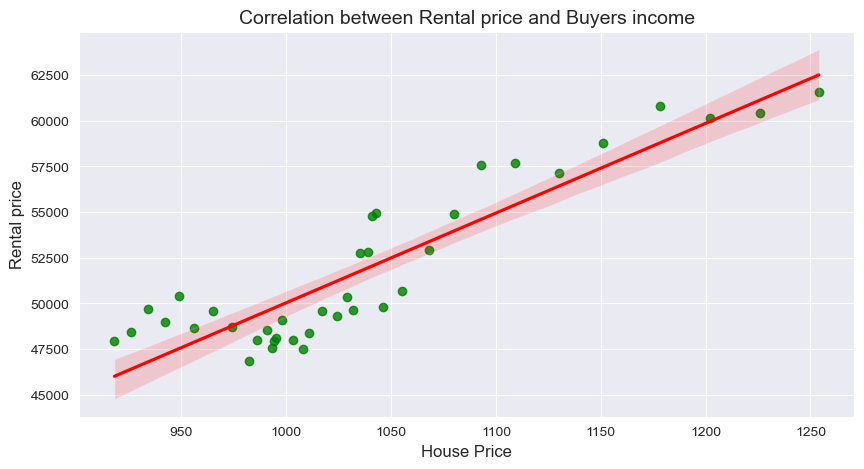

In [127]:
plt.figure(figsize=(10, 5))
sns.regplot(x=data_for_correlation['Rental price'],
            y=data_for_correlation['Buyers income'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between Rental price and Buyers income', fontsize=14)
plt.xlabel('House Price', fontsize=12)
plt.ylabel('Rental price', fontsize=12)
plt.grid(True)
plt.show()

Positive Correlation: 

    There is a strong positive correlation between rental price and buyers' income, meaning that as rental prices increase, buyers' income also increases.

Linear Relationship: 

    The red line (regression line) suggests a clear linear trend, indicating that the relationship between rental price and buyers' income is almost directly proportional. Higher rental prices are associated with significantly higher buyers' income.

Low Variability: 

    Compared to the previous plots, there is less spread around the regression line. Most of the data points are closely clustered around the line, indicating that the relationship between rental prices and buyers' income is relatively consistent.

Confidence Interval: 

    The confidence interval (shaded area around the regression line) is narrow for most of the data, indicating high confidence in the model’s predictions. However, it widens slightly at higher rental prices, suggesting a bit more variability at the upper end.